In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Proyecto final del curso de BI

- Se analizaron registro de Incidentes ocurridos del 2015 al 2018 en la ciudad de Londres

In [6]:
df = pd.read_csv('Proyecto-final.csv')
df.head()


,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim_Category,Victims_Sex,Victims_Age
0,2015,01/01/2015,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,01/01/2015,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,01/01/2015,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [71]:
def DeleteIs2PercentLess(DataFrame2, Column_x, Percent):
    registro_a = DataFrame2[DataFrame2.Percent <= Percent].sum()
    df_others = DataFrame2[DataFrame2.Percent <= Percent]
    print('Otros con <= porcentaje de '+
        str(Percent)+' = '+
        str(list(df_others[Column_x]))+
        ' por un total de '+str(registro_a[1])+' Incidentes')
    registro_a[0] = 'Others'
    # Convirtiendo en DataFrame la suma de los menor de 3%
    df_x = {Column_x:[registro_a[0]], 'Total':[registro_a[1]], 'Percent':[registro_a[2]]}
    df_x = pd.DataFrame(df_x)
    df_x = df_x.set_index(Column_x)
    # Borrar registro con "Percent" menos
    df2 = DataFrame2.drop(DataFrame2.index[DataFrame2.Percent <= Percent], axis=0)
    df2 = df2.set_index(Column_x)
    df2 = pd.concat([df2, df_x])
    return df2
def PercentForColumn(DataFrame, Column, Percent):
    df1 = DataFrame.groupby(Column).size().reset_index(name='Total')
    df1['Percent'] = (df1['Total']/df1['Total'].sum())*100
    df3 = DeleteIs2PercentLess(df1, Column, Percent)
    return df3.sort_values(by=['Percent'], ascending=False)

### 1. Vista por tipo de evento

Otros con <= porcentaje de 3 = ['Activity Incident Event', 'Assault', 'Fire', 'Robbery', 'Safety Critical Failure', 'Vandalism Hooliganism'] por un total de 852 Incidentes


,Total,Percent
Incident Event Type,,
Slip Trip Fall,6981,30.145090
Onboard Injuries,6563,28.340098
Personal Injury,4596,19.846273
Collision Incident,4166,17.989464
Others,852,3.679074


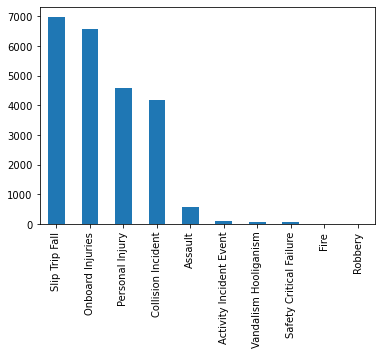

In [72]:
df['Incident Event Type'].value_counts(ascending=False).plot(kind='bar')
PercentForColumn(df, 'Incident Event Type',3)

### 2. Vista por tipo de Operador

Otros con <= porcentaje de 2 = ['Abellio West', 'Arriva Kent Thameside', 'Arriva The Shires', 'Blue Triangle Buses', 'C T Plus', 'Docklands Buses', 'H R Richmond', 'London Sovereign', 'Quality Line', 'Sullivan Bus & Coach', 'Sullivan Buses', 'TGM GROUP', 'Uno Buses'] por un total de 1468 Incidentes


,Total,Percent
Operator,,
Metroline,3457,14.927887
Arriva London North,3208,13.852664
East London,2402,10.372226
London United,2263,9.772001
Selkent,1808,7.807237
Arriva London South,1743,7.526557
London General,1723,7.440193
Others,1468,6.339062
London Central,1367,5.902928


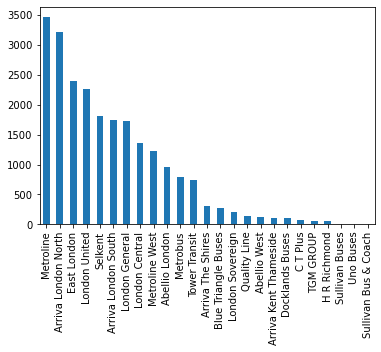

In [73]:
df['Operator'].value_counts(ascending=False).plot(kind='bar')
PercentForColumn(df, 'Operator',2)

### 3. Grafico por Categoria de victima 
- Excluyendo a Passenger 18,828 incidentes

<AxesSubplot:>

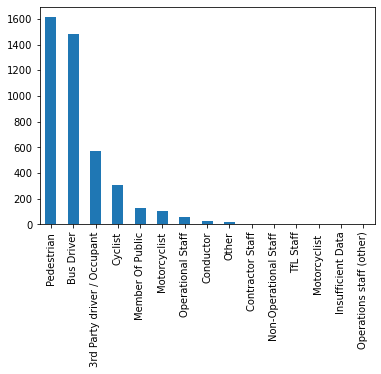

In [74]:
Q1 = df[df.Victim_Category != 'Passenger']
Q1['Victim_Category'].value_counts(ascending=False).plot(kind='bar') 

### 4. Cuadro de Victimas por Categoria divididas por Sexo

In [84]:
Q1 = df
category = list(set(df['Victim_Category']))
sex = list(set(df['Victims_Sex']))
data2 = []
#data9=[ [0,0,0] for i in range(16)]           
for b in range(16):
    data3=[]
    for a in range(3):
        #data9[b][a] = len(df[(Q1['Victims_Sex'] == sex[a]) & (Q1['Victim_Category'] == category[b])])
        data3.append(len(df[(Q1['Victims_Sex'] == sex[a]) & (Q1['Victim_Category'] == category[b])]))
    data2.append(data3)
data1 = pd.DataFrame(data2, index=category,columns=['Male','Female','Unknow'])
data1.sort_values(by=['Male'], ascending=False)


,Male,Female,Unknow
Passenger,3176,10754,4898
Pedestrian,215,549,848
3rd Party driver / Occupant,98,190,285
Cyclist,50,59,199
Member Of Public,17,60,50
Motorcyclist,14,3,85
Operational Staff,11,7,41
Other,7,5,4
Bus Driver,5,214,1265
Conductor,4,5,19


### 5. Cuadro de Incidentes por Tipo divididas por Año

In [85]:
Q1 = df
event = list(set(df['Incident Event Type']))
year = list(set(df['Year']))
year.sort()

data2 = []
for b in range(10):
    data3=[]
    for a in range(4):
        data3.append(len(df[(Q1['Year'] == year[a]) & (Q1['Incident Event Type'] == event[b])]))
    data2.append(data3)
data1 = pd.DataFrame(data2, index=event, columns=['2015','2016','2017','2018'])
data1

,2015,2016,2017,2018
Safety Critical Failure,26,25,9,6
Robbery,0,1,1,1
Assault,121,164,204,101
Personal Injury,0,876,2071,1649
Fire,0,3,3,0
Onboard Injuries,4395,2168,0,0
Collision Incident,1150,1231,1143,642
Slip Trip Fall,0,1574,3074,2333
Activity Incident Event,0,28,53,33
Vandalism Hooliganism,23,23,15,12


### 6. Pie de Accidentes por año

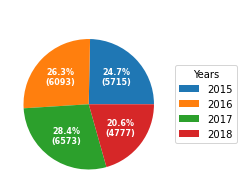

In [86]:
year = list(set(df['Year']))
year.sort()
cantidad = []
for a in range(4):
    cantidad.append(len(df[(Q1['Year'] == year[a])]))

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = cantidad
ingredients = year

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),textprops=dict(color="w"))
ax.legend(wedges, ingredients,title="Years",loc="center left",
bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Accidentados por año", color="w")

plt.show()